# Re-do: Veamos cuál sería el uso común de galaxychop (desp de este refactoring) y exploremos ~~todas~~ la mayoría de las posibilidades que ofrece

### 1st: import glxchop

In [1]:
import galaxychop as gchop
# Por ahora lo veamos importando más librerías solo cuando sea necesario (en un uso típico)

### Leamos alguna glx

In [2]:
gal = gchop.io.read_hdf5("../tests/datasets/gal394242.h5")
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

In [3]:
# Si la quiero como dataframe (check both forms)
df_gal = gal.to_dataframe()
df_gal

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


### Remember, esta librería sirve para analizar galaxias de simulaciones hydro/N-body i.e. quiero estudiar las propiedades dinámicas de la misma. Entonces, podemos:

* ### i) asegurarnos de que esté preprocesada (siendo que la glx proviene de una simulación cosmológica o ideal);
* ### ii) transformar paso a paso esta galaxia (centrado, alineado, cortado, etc) para;
* ### iii) terminar descomponiendo la galaxia según la dinámica de sus estrellas (dado método de descomposición).

In [4]:
# 1st, check if centered, align, and if it has the potential energy calculated
# (entirely and only stars):
print(f'The stellar particles have their potential energy calculated?'+\
      f' {gal.stars.has_potential_}')
print(f'The system has its potential energy calculated?'+\
      f' {gal.has_potential_}')


The stellar particles have their potential energy calculated? True
The system has its potential energy calculated? True


In [20]:
# Then, exploiting the refactor, check if center and align:

Centralizer = gchop.preproc.Centralizer(with_potential=True)
# Because I already check that the galaxy has the potential computed
Aligner = gchop.preproc.Aligner(r_cut=10.)  # The default is 30 kpc (!). I don't know the galaxy size
# (Maybe debería explicar ese paso previo? Pero la gracia es que todavía no sé cómo es mi galaxia;
# Visual check usando el módulo plot and then check if centred or aligned?)

print(f'The galaxy is centered?'+\
      f' {Centralizer.checker(gal)}')
print(f'The galaxy is aligned?'+\
      f' {Aligner.checker(gal)}')

The galaxy is centered? False
The galaxy is aligned? False


#### *El checker del align no debería decir nada del centrado, sólo el transform hinchar los huevos (warning, ni siquiera una exception porque eso queda para el usuario)

In [6]:
# I want to align my galaxy, it is possible without centering it?
aligned_glx = Aligner.transform(gal)

/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/preproc/salign.py:156: UserWarning: Input Galaxy is not centered. Please, center it                 with Centralizer.transform(galaxy)                 or proceed with caution.
  warnings.warn(


### A warning is shown, since we don't want to interrump the workflow, just aware the user...

In [7]:
aligned_glx

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

In [8]:
# I want to dynamically decompose my galaxy, it is posible straightforward?
Decomposer = gchop.models.JThreshold(eps_cut=0.7)

decomp_glx = Decomposer.decompose(gal)

/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/models/_base.py:670: UserWarning: Input Galaxy is not centered. Please, center it                     with Centralizer.transform(galaxy)                     or proceed with caution.
  warnings.warn(
/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/models/_base.py:678: UserWarning: Input Galaxy is not aligned. Please, align it                     with Aligner.transform(galaxy)                     or proceed with caution.
  warnings.warn(


## So, now that I checked the status of my galaxy, let's do it as intended (with and without a pipeline)

In [21]:
# I don't want to overwrite my vanilla galaxy, just for comparison
transf_gal = gal

# 1st, let's center it (it has the potential energy calculated)
transf_gal = Centralizer.transform(transf_gal)
# Then, rotate it (align its larger angular momentum component to the z axis)
transf_gal = Aligner.transform(transf_gal)

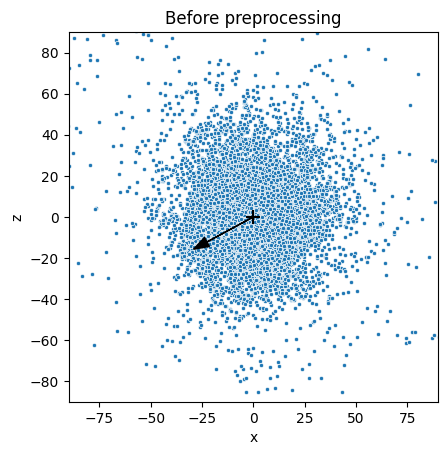

In [22]:
# Draw without importing maltplotlib, but maybe preferrable...

# Stars of the galaxy, before rotation
ax = gal.plot.scatter("x", "z", ptypes='stars')
# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')
# The angular momentum vector:
Jx_tot = gal.stars.Jx_.value.sum()
Jy_tot = gal.stars.Jy_.value.sum()
Jz_tot = gal.stars.Jz_.value.sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)
ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5)
#ax.set_aspect('equal', adjustable='box')
ax.set_title('Before preprocessing')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

*OJO: El Jz sólo va a estar correctamente alineado si considero las mismas que usé para rotar...*

In [25]:
import numpy as np
# You can chop the galaxy (ba-dum tss) or calculate distance to manually mask:
r_stars = np.linalg.norm((transf_gal.stars.x.value,
                          transf_gal.stars.y.value,
                          transf_gal.stars.z.value), axis=0)

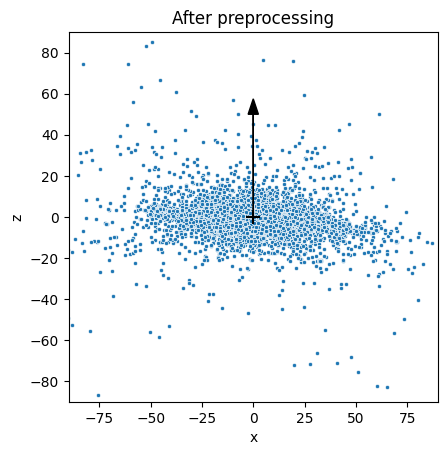

In [26]:
# Stars of the galaxy, after rotation
ax = transf_gal.plot.scatter("x", "z", ptypes='stars')
# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')
# The angular momentum vector:
Jx_tot = transf_gal.stars.Jx_.value[r_stars < 10.].sum()
Jy_tot = transf_gal.stars.Jy_.value[r_stars < 10.].sum()
Jz_tot = transf_gal.stars.Jz_.value[r_stars < 10.].sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)
ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5)
#ax.set_aspect('equal', adjustable='box')
ax.set_title('After preprocessing')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

### Once centered and aligned, let's decompose our galaxy (given a method)

In [27]:
# I want to dynamically decompose my galaxy using the orbital circularity
# threshold epsilon_j = 0.7:
Decomposer = gchop.models.JThreshold(eps_cut=0.7)

decomp_glx = Decomposer.decompose(transf_gal)
decomp_glx

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>
<Components length=272647, labels=['Disk', 'Spheroid', 'nan'], probabilities=False, lmap=True>

### Now, my galaxy has become a **Decomposed Galaxy**, which knows the state of the whole system (stars + gas + DM) but also knows which stellar particle was classified as 'Spheroid' or as 'Disk'.

**Particles that are not stars recieve the 'NaN' label for component...*

In [28]:
# We can access both stages:
print(decomp_glx.galaxy)  # Idem as 'transf_gal'
print(decomp_glx.components)  # Obtained after the decomposition

# Let's check more details about the components:
decomp_glx.components.describe()

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>
<Components length=272647, labels=['Disk', 'Spheroid', 'nan'], probabilities=False, lmap=True>


Particles          Deterministic mass          
              Size Fraction               Size  Fraction
Spheroid     16133  0.43324       1.546971e+10  0.415186
Disk         21105  0.56676       2.178995e+10  0.584814

In [29]:
# Or, if I want it as a dataframe
df_components = decomp_glx.components.to_dataframe()
df_components

,m,labels,ptypes,lmap
0,5.224283e+05,0.0,stars,Spheroid
1,9.745897e+05,NaN,stars,NaN
2,6.935776e+05,0.0,stars,Spheroid
3,1.070959e+06,0.0,stars,Spheroid
4,6.013803e+05,0.0,stars,Spheroid
...,...,...,...,...
272642,1.429845e+06,NaN,gas,NaN
272643,1.436841e+06,NaN,gas,NaN
272644,1.690580e+06,NaN,gas,NaN
272645,1.210975e+06,NaN,gas,NaN


### We keep the dimensions of the full galaxy, only labeling stellar particles. Let's see them:

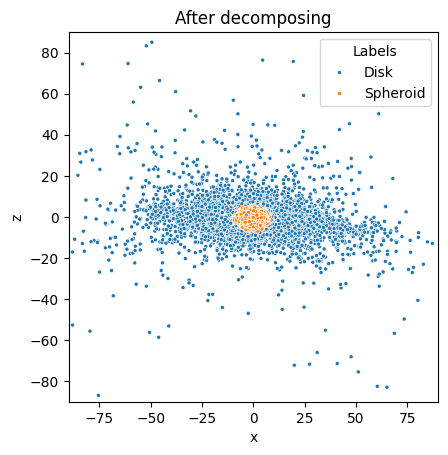

In [ ]:
# Stars of the galaxy, separated by component:
# Since I'm specifying lmap, I don't need to choose ptypes (!)
ax = decomp_glx.galaxy.plot.scatter("x", "z",
                                    labels=decomp_glx.components,
                                    lmap={0: "Spheroid", 1: "Disk"})

#ax.set_aspect('equal', adjustable='box')
ax.set_title('After decomposing')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

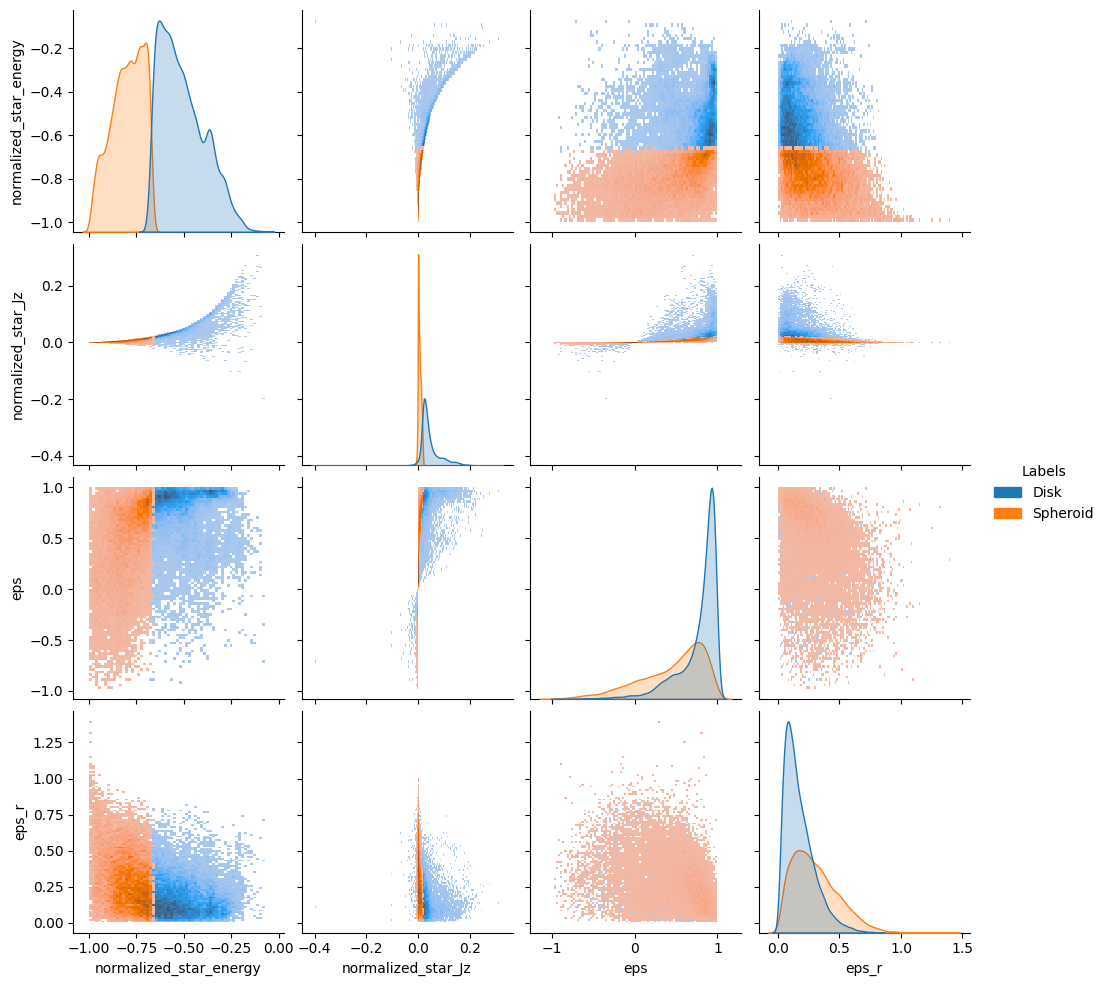

In [33]:
# A more detailed view of the parameters:
decomp_glx.galaxy.plot.sdyn_pairplot(labels=decomp_glx.components,
                                     lmap={0: "Spheroid", 1: "Disk"});

## To facilitate and ensure the identical pre-processing and decomposition of a sample of galaxies, let's create a pipeline that recreate the whole chain of transformations

In [34]:
# Create a pipeline from scratch with the glxchop implementation:
# We can pass the arguments to the transformer/decomposer and then
# apply the pipeline to different galaxies:

Centralizer = gchop.preproc.Centralizer(with_potential=True)
Aligner_0 = gchop.preproc.Aligner(r_cut=10)
Decomposer_0 = gchop.models.JThreshold(eps_cut=0.7)

# 1st pipeline
pipe_0 = gchop.GchopPipeline(
        [
        ("transformer_0",Centralizer),
        ("transformer_1",Aligner_0),
        ("decomposer_0",Decomposer_0)
        ]
    )

# Before:
print(f'The galaxy is centered?'+\
      f' {Centralizer.checker(gal)}')
print(f'The galaxy is aligned?'+\
      f' {Aligner_0.checker(gal)}')

The galaxy is centered? False
The galaxy is aligned? False


In [35]:
# And we do the full process in with one line:
decomposed_gal_0 = pipe_0.decompose(gal)

# After:
print(f'The galaxy is centered?'+\
      f' {Centralizer.checker(decomposed_gal_0.galaxy)}')
print(f'The galaxy is aligned?'+\
      f' {Aligner_0.checker(decomposed_gal_0.galaxy)}')
decomposed_gal_0.components.describe()

The galaxy is centered? True
The galaxy is aligned? True


Particles          Deterministic mass          
              Size Fraction               Size  Fraction
Spheroid     16133  0.43324       1.546971e+10  0.415186
Disk         21105  0.56676       2.178995e+10  0.584814

In [36]:
# Repeat using another aligner and other decomposer, but keeping the centralizer:

Centralizer = gchop.preproc.Centralizer(with_potential=True)
Aligner_1 = gchop.preproc.Aligner(r_cut=20)
Decomposer_1 = gchop.models.JEHistogram()

# 2nd pipeline
pipe_1 = gchop.GchopPipeline(
        [
        ("transformer_0",Centralizer),
        ("transformer_1",Aligner_1),
        ("decomposer_0",Decomposer_1)
        ]
    )

In [37]:
# And we do the full process in with one line:
decomposed_gal_1 = pipe_1.decompose(gal)

# New method
decomposed_gal_1.components.describe()

Particles           Deterministic mass          
              Size  Fraction               Size  Fraction
Spheroid      5595  0.150177       5.245463e+09  0.140716
Disk         31661  0.849823       3.203145e+10  0.859284

In [38]:
# For completitude:
print(f'The galaxy is aligned?'+\
      f' {Aligner_1.checker(decomposed_gal_1.galaxy)}')

The galaxy is aligned? True


### The "JEHistogram" (Cristiani+25) shows a higher disc mass than the naïve cut in orbital circularity. Let's delve into those components:

In [39]:
df_decomp = decomposed_gal_1.galaxy.to_dataframe()
df_comps = decomposed_gal_1.components.to_dataframe()
df_comps

,m,labels,ptypes,lmap
0,5.224283e+05,0.0,stars,Spheroid
1,9.745897e+05,0.0,stars,Spheroid
2,6.935776e+05,0.0,stars,Spheroid
3,1.070959e+06,0.0,stars,Spheroid
4,6.013803e+05,0.0,stars,Spheroid
...,...,...,...,...
272642,1.429845e+06,NaN,gas,NaN
272643,1.436841e+06,NaN,gas,NaN
272644,1.690580e+06,NaN,gas,NaN
272645,1.210975e+06,NaN,gas,NaN


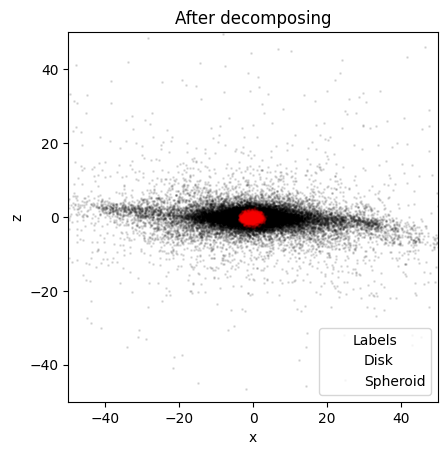

In [48]:
# Queda horrible eso. Vamos de a uno:
ax = decomposed_gal_1.galaxy.plot.scatter("x", "z",
                                    labels=decomposed_gal_1.components,
                                    lmap={0: "Spheroid", 1: "Disk"},
                                    alpha=0.0)
# Only "Disc":
cond_here = (df_comps.lmap.values == "Disk")
ax.scatter(df_decomp.x.values[cond_here],df_decomp.z.values[cond_here],
           c='k', alpha=0.1, s=1)
# Only "Spheroid":
cond_here = (df_comps.lmap.values == "Spheroid")
ax.scatter(df_decomp.x.values[cond_here],df_decomp.z.values[cond_here],
           c='r', alpha=0.1, s=1)
           

#ax.set_aspect('equal', adjustable='box')
ax.set_title('After decomposing')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_box_aspect(1)

# --------------------------o--------------------------

## **WIP** Pero arrancamos de una galaxia hecha y derecha ¿Qué pasa si tengo mis datos y no es tan obvio que glxchop me entienda una galaxia? -> ¡Creemos un objeto galaxia desde 0! (con nuestros sup datos)

# --------------------------o--------------------------

## Read your .hdf5 with a galaxy:

In [49]:
import h5py
# For a given glx:

glx_hdf5 = h5py.File(f'../tests/datasets/gal394242.h5','r')

### Make your arrays

*We proceed as we have one.*

In [105]:
# ID, mass, x, y, z, vx, vy, vz, potential -> I will OMIT this
glx_stars = glx_hdf5['stars'][:].tolist()
glx_gas = glx_hdf5['gas'][:].tolist()
glx_dm = glx_hdf5['dark_matter'][:].tolist()

# Make them manageable:
glx_stars = np.reshape(glx_stars, (np.shape(glx_stars)[0], np.shape(glx_stars)[1]))
glx_gas = np.reshape(glx_gas, (np.shape(glx_gas)[0], np.shape(glx_gas)[1]))
glx_dm = np.reshape(glx_dm, (np.shape(glx_dm)[0], np.shape(glx_dm)[1]))

## Use Galaxychop to create a "Galaxy" object and manipulate it with the library:

In [ ]:
# Put the array into the builder. We want to compute the potential of the system, given a
# force-softening length (Plummer equivalent):
gal = gchop.mkgalaxy(glx_stars[:, 1],
                     glx_stars[:, 2], glx_stars[:, 3], glx_stars[:, 4],
                     glx_stars[:, 5], glx_stars[:, 6], glx_stars[:, 7],
                     glx_dm[:, 1], 
                     glx_dm[:, 2], glx_dm[:, 3], glx_dm[:, 4],
                     glx_dm[:, 5], glx_dm[:, 6], glx_dm[:, 7],
                     glx_gas[:, 1], 
                     glx_gas[:, 2], glx_gas[:, 3], glx_gas[:, 4],
                     glx_gas[:, 5], glx_gas[:, 6], glx_gas[:, 7],
                     softening_s = 0.5, softening_dm = 0.5, softening_g = 0.5)
#                    potential_s = _, potential_dm = _, potential_g = _)
# -> We skip the potential (we will assume that we don't have it)

### We assert that the galaxy passed does not have the potential energy of their particles

In [ ]:
gal

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=False>

In [110]:
df_gal = gal.to_dataframe()
df_gal

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.5,NaN,290.293111,NaN,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.5,NaN,274.782915,NaN,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.5,NaN,193.699612,NaN,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.5,NaN,62.113089,NaN,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.5,NaN,314.128285,NaN,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.5,NaN,15028.258726,NaN,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.5,NaN,5253.889589,NaN,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.5,NaN,14223.961789,NaN,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.5,NaN,5860.384564,NaN,-4472.122980,-14467.594426,3504.632690


## However, we can i) Compute it (we highly suggest the slow but robust direct-summation approach implemented in Galaxychop); or ii) continue without it, with limited functionalities (the centering will be only a poor approximation and some decomposers will not work).

### Let's try i)

*The direct-summation is implemented as a fortran back-end for higher performance.*

In [114]:
poter = gchop.preproc.potential_energy.Potentializer()

CREATED POTENCIALIZER WITH BACKEND  fortran


# WIP: Change the docs. The default must be fortran

In [115]:
poter.checker(gal)

False

### Recall that, for a typical galaxy from a cosmological simulation, there are 200k~300k particles (stars + dm + gas) to compute the potential, which is an O(n^2) operation. Thus, we highly recommend doing this task in a cluster PC, given the possible paralelization of the potential calculation.

*In a personal laptop, a typical galaxy implies a wall-time of ~8 mins.*

In [ ]:
gal_with_potential = poter.transform(gal)

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

In [ ]:
df_gal_pot = gal_with_potential.to_dataframe()
df_gal_pot

### And you may continue as above...

### However, if you want to ocntinue without the hard task of calculate the potential, you can let the *transformer* know it:

### Centralizer

In [120]:
ctrl = gchop.preproc.Centralizer(with_potential=False)

In [121]:
gal_ctrl = ctrl.transform(gal)

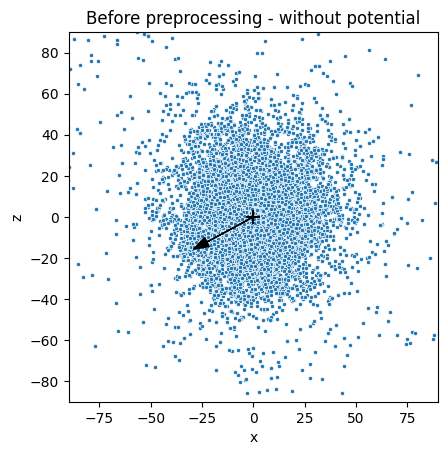

In [127]:
# Stars of the galaxy, before rotation
ax = gal_ctrl.plot.scatter("x", "z", ptypes='stars')
# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')
# The angular momentum vector:
Jx_tot = gal_ctrl.stars.Jx_.value.sum()
Jy_tot = gal_ctrl.stars.Jy_.value.sum()
Jz_tot = gal_ctrl.stars.Jz_.value.sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)
ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5)
#ax.set_aspect('equal', adjustable='box')
ax.set_title('Before preprocessing - without potential')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

### Aligner

In [124]:
align = gchop.preproc.Aligner(r_cut=10)

## WIP: Check the warning/errors shown:

**An error of "not centered" will raise due to a ~bad centering/alineation without potential**

In [125]:
gal_algn = align.transform(gal_ctrl)

/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/preproc/pcenter.py:229: FutureWarning: The behavior of Series.argmax/argmin with skipna=False and NAs, or with all-NAs is deprecated. In a future version this will raise ValueError.
  minpot_idx = df.potential.argmin()
/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/preproc/salign.py:156: UserWarning: Input Galaxy is not centered. Please, center it                 with Centralizer.transform(galaxy)                 or proceed with caution.
  warnings.warn(


In [128]:
# You can chop the galaxy (ba-dum tss) or calculate distance to manually mask:
r_stars = np.linalg.norm((gal_algn.stars.x.value,
                          gal_algn.stars.y.value,
                          gal_algn.stars.z.value), axis=0)

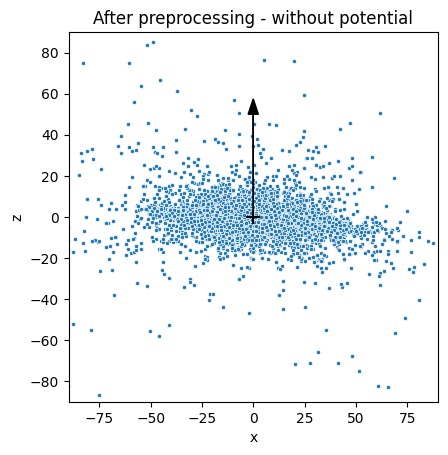

In [130]:
# Stars of the galaxy, after rotation
ax = gal_algn.plot.scatter("x", "z", ptypes='stars')
# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')
# The angular momentum vector:
Jx_tot = gal_algn.stars.Jx_.value[r_stars < 10.].sum()
Jy_tot = gal_algn.stars.Jy_.value[r_stars < 10.].sum()
Jz_tot = gal_algn.stars.Jz_.value[r_stars < 10.].sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)
ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5)
#ax.set_aspect('equal', adjustable='box')
ax.set_title('After preprocessing - without potential')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

### We can also apply a new *transform* "Cutter", to chop the outer particles:

In [131]:
# Especify the number of r_50,* to use. Try with 1 r_50,*:
cuttr = gchop.preproc.Cutter(num_radii=1)

In [132]:
r_sh = gchop.preproc.smr_crop.get_radius_half_mass(gal_algn, particle='stars')
r_sh

7.5838862403736265

# WIP: Esto lo tenemos que hacer antes. Con un mal centrado esto devuelve cualqueir wea...

## Check it:

In [133]:
M_star_tot = np.sum(gal_algn.stars.m)
M_star_tot

<Quantity 3.74278958e+10 solMass>

In [134]:
# sort the stars w.r.t. galactocentric distance
idx_r_sorted = np.argsort(r_stars)

In [136]:
cumsum = np.cumsum(gal_algn.stars.m.value[idx_r_sorted])

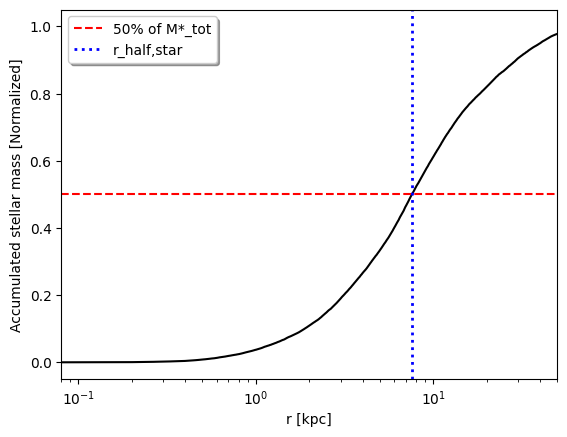

In [137]:
import matplotlib.pyplot as plt

plt.plot(r_stars[idx_r_sorted],cumsum/cumsum[-1],c='k')
plt.axhline(0.5,ls='--',c='r',label='50% of M*_tot')
plt.axvline(r_sh,ls=':',c='b',lw=2,label='r_half,star')

plt.xlim(0.08,50)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('Accumulated stellar mass [Normalized]')
plt.legend(loc='upper left', shadow=True)

plt.show()
plt.close()

# Again, anda pero esta descentrado => retorna algo mal calculado

### Y aplico el Cutter:

In [138]:
gal_cut = cuttr.transform(gal_algn)

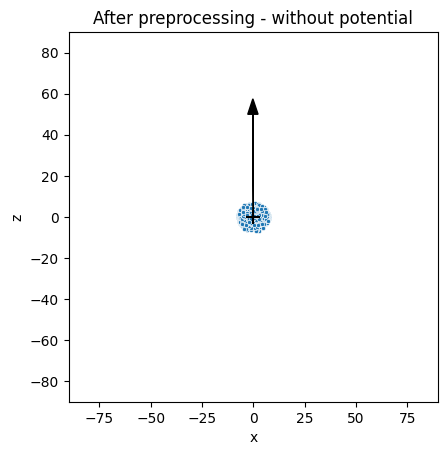

In [ ]:
# Stars of the galaxy, after rotation
ax = gal_cut.plot.scatter("x", "z", ptypes='stars')
# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')
# The angular momentum vector:
Jx_tot = gal_cut.stars.Jx_.value.sum()
Jy_tot = gal_cut.stars.Jy_.value.sum()
Jz_tot = gal_cut.stars.Jz_.value.sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)
ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5)
#ax.set_aspect('equal', adjustable='box')
ax.set_title('After preprocessing - cutted')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_box_aspect(1)

# **-------------------------------**

## If you want to use the potential but you don't have it, an error will raise and the workflow/pipeline is going to stop.

In [142]:
ctr_pot = gchop.preproc.Centralizer(with_potential=True)
ctr_pot.transform(gal)

ValueError: Galaxy must has the potential energy. Use             with_potential = False